<a href="https://colab.research.google.com/github/DINKI2005/SCT_ML_1/blob/main/housepricepredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

print("🏠 House Price Prediction")
print(f"Dataset: {len(df)} houses loaded")


🏠 House Price Prediction
Dataset: 20640 houses loaded


In [3]:
X = df[['AveRooms', 'AveBedrms']]
y = df['PRICE']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)


In [5]:
print(f"\n📊 Model Performance:")
print(f"R² Score: {r2:.3f} ({r2*100:.1f}% accuracy)")

print(f"\n🔍 How features affect price:")
print(f"- AveRooms: ${model.coef_[0]:.3f} per room")
print(f"- AveBedrms: ${model.coef_[1]:.3f} per bedroom")

# Sample predictions
samples = [[5.0, 1.2], [7.0, 1.5], [4.0, 1.0]]
predictions = model.predict(samples)

print(f"\n🏡 Sample Predictions:")
for i, (rooms, bedrooms) in enumerate(samples):
    print(f"House {i+1}: {rooms} rooms, {bedrooms} bedrooms → ${predictions[i]*100:.0f}k")



📊 Model Performance:
R² Score: 0.106 (10.6% accuracy)

🔍 How features affect price:
- AveRooms: $0.324 per room
- AveBedrms: $-1.631 per bedroom

🏡 Sample Predictions:
House 1: 5.0 rooms, 1.2 bedrooms → $176k
House 2: 7.0 rooms, 1.5 bedrooms → $192k
House 3: 4.0 rooms, 1.0 bedrooms → $176k


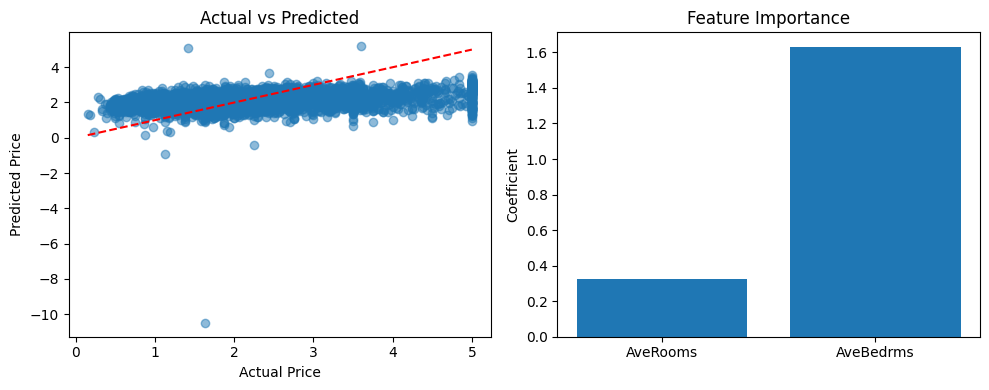


✅ Done! Model ready to predict house prices from rooms and bedrooms.


In [6]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.bar(['AveRooms', 'AveBedrms'], abs(model.coef_))
plt.title('Feature Importance')
plt.ylabel('Coefficient')

plt.tight_layout()
plt.show()

print(f"\n✅ Done! Model ready to predict house prices from rooms and bedrooms.")